In [393]:
import numpy as np

def calculate_newton_base(x_bar, x):
    return np.prod([x_bar - x_i for x_i in x])

def forward_substitution(L, y):
    n = len(y)
    b = np.zeros(n)
    b[0] = y[0] / L[0][0]
    for k in range(0, n-1):
        for i in range(k+1, n):
            y[i] = y[i] - L[i][k] * b[k]
        b[k+1] = y[k+1] / L[k+1][k+1]
    return b.tolist()

def newton_interpolation(x, y):
    n = len(x)
    L = np.zeros((n,n))
    
    L[:,0] = 1
    for i in range(1,n):
        for j in range(1, i+1):
            L[i][j] = calculate_newton_base(x[i], x[:j])
            
    return forward_substitution(L, y)

def newton_evalutation(b, x, x_bar):
    p = b[-1]
    for k in range(len(b)-2, -1, -1):
        p = b[k] + (x_bar - x[k]) * p
    return p

In [394]:
import unittest

class TestInterpolation(unittest.TestCase):
    def test_newton_interpolation(self):
        self.assertEqual(newton_interpolation([0,1,2],[0,1,0]), [0,1,-1])
        self.assertEqual(newton_interpolation([0,2,1],[0,0,1]), [0,0,-1])
        
    def test_newton_evalutation(self):
        b =[0,1,-1]
        self.assertEqual(newton_evalutation(b,[0,1,2],0), 0)
        self.assertEqual(newton_evalutation(b,[0,1,2],1), 1)
        self.assertEqual(newton_evalutation(b,[0,1,2],2), 0)

def run_tests(test_class):
    suite = unittest.TestLoader().loadTestsFromTestCase(test_class)
    unittest.TextTestRunner(verbosity=2).run(suite)
    
run_tests(TestInterpolation)

test_newton_evalutation (__main__.TestInterpolation.test_newton_evalutation) ... ok
test_newton_interpolation (__main__.TestInterpolation.test_newton_interpolation) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


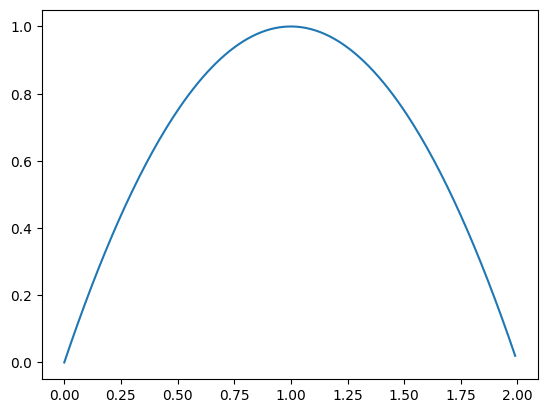

In [407]:
import matplotlib.pyplot as plt

class NewtonPolynomial:
    def __init__(self, x, y):
        self.x = x
        self.b = newton_interpolation(x, y)

    def evaluate(self, x):
        p = self.b[-1]
        for k in range(len(self.b) - 2, -1, -1):
            p = self.b[k] + (x - self.x[k]) * p
        return p

x = [0,1,2]
y = [0,1,0]
polynomial = NewtonPolynomial(x, y)
 
values = np.arange(0, 2, 0.01)
plt.plot(values, polynomial.evaluate(values))